# ESTUDIO DESCRIPTIVO DE DATOS SOBRE VENTA DE VINOS. 
# DEPURACIÓN DE VARIABLES

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Inspección

In [3]:
# Lectura de datos
vinos = pd.read_csv(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MINERÍA DE DATOS Y MODELACIÓN ejercicios\1. Ejercicio base datos vino\script_base_vinos\DatosVino.csv')
vinos.head()

,ID,Beneficio,Compra,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella
0,2,515,1,0.16,-0.81,26.10,-0.425,1.02792,3.38,0.70,144.0,M,2,***,1.0,1.00
1,4,585,1,2.64,-0.88,14.80,0.037,0.99518,3.12,0.48,22.0,M,3,***,3.0,3.38
2,8,0,0,0.29,-0.40,21.50,0.060,0.99572,3.49,1.21,10.3,R,3,?,1.0,3.72
3,11,775,1,-1.22,0.34,1.40,0.040,1.03236,3.20,NaN,11.6,B,2,***,2.0,6.23
4,12,596,1,0.27,1.05,11.25,-0.007,0.99620,4.93,0.26,15.0,R,1,?,2.0,2.44


In [4]:
# Información del dataset. Ver tipo de variables y cantidad
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6365 entries, 0 to 6364
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              6365 non-null   int64  
 1   Beneficio       6365 non-null   int64  
 2   Compra          6365 non-null   int64  
 3   Acidez          6365 non-null   float64
 4   AcidoCitrico    6365 non-null   float64
 5   Azucar          6365 non-null   float64
 6   CloruroSodico   6066 non-null   float64
 7   Densidad        6365 non-null   float64
 8   pH              6170 non-null   float64
 9   Sulfatos        5761 non-null   float64
 10  Alcohol         6365 non-null   float64
 11  Etiqueta        6365 non-null   object 
 12  CalifProductor  6365 non-null   int64  
 13  Clasificacion   6365 non-null   object 
 14  Region          6258 non-null   float64
 15  PrecioBotella   6365 non-null   float64
dtypes: float64(10), int64(4), object(2)
memory usage: 795.8+ KB


In [5]:
# Número de valores distintos por variable
vinos.nunique()

ID                6365
Beneficio          983
Compra               2
Acidez             659
AcidoCitrico       523
Azucar            1639
CloruroSodico     1406
Densidad          3614
pH                 436
Sulfatos           543
Alcohol            312
Etiqueta            10
CalifProductor      13
Clasificacion        5
Region               3
PrecioBotella      598
dtype: int64

In [6]:
import plotly.express as px

In [7]:
# Histograma de calificación del productor
fig = px.histogram(vinos, x="CalifProductor")
fig.update_layout(width=900, height=600)
fig.show()

In [8]:
# Conversión a factor de toda variable con menos de 10 valores distintos
# Lista de columnas con menos de 10 valores distintos. Potenciales factores!
to_factor = list(vinos.loc[:,vinos.nunique() <= 10]) 

# Podemos cambiar el tipo de todas ellas a factor de una vez
vinos[to_factor] = vinos[to_factor].astype('category')

In [9]:
print(to_factor)

['Compra', 'Etiqueta', 'Clasificacion', 'Region']


In [10]:
# Número de valores distintos por variable
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6365 entries, 0 to 6364
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              6365 non-null   int64   
 1   Beneficio       6365 non-null   int64   
 2   Compra          6365 non-null   category
 3   Acidez          6365 non-null   float64 
 4   AcidoCitrico    6365 non-null   float64 
 5   Azucar          6365 non-null   float64 
 6   CloruroSodico   6066 non-null   float64 
 7   Densidad        6365 non-null   float64 
 8   pH              6170 non-null   float64 
 9   Sulfatos        5761 non-null   float64 
 10  Alcohol         6365 non-null   float64 
 11  Etiqueta        6365 non-null   category
 12  CalifProductor  6365 non-null   int64   
 13  Clasificacion   6365 non-null   category
 14  Region          6258 non-null   category
 15  PrecioBotella   6365 non-null   float64 
dtypes: category(4), float64(9), int64(3)
memory usage: 622.5 KB


In [11]:
# Número de valores únicos por variable
vinos.nunique()

ID                6365
Beneficio          983
Compra               2
Acidez             659
AcidoCitrico       523
Azucar            1639
CloruroSodico     1406
Densidad          3614
pH                 436
Sulfatos           543
Alcohol            312
Etiqueta            10
CalifProductor      13
Clasificacion        5
Region               3
PrecioBotella      598
dtype: int64

# Descriptivos para las variables

In [12]:
# Número de valores distintos por variable
vinos.describe()

,ID,Beneficio,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella
count,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6066.000000,6365.000000,6170.000000,5761.000000,6365.000000,6365.000000,6365.000000
mean,8010.702278,452.380204,0.331214,0.314350,4718.669780,0.051348,0.994204,3.202207,0.526659,16.250102,2.761508,2.610652
std,4654.939139,308.380542,0.787534,0.861428,21192.546521,0.322715,0.026417,0.678330,0.948039,25.598217,1.319127,1.480274
min,2.000000,0.000000,-2.790000,-3.240000,-127.100000,-1.171000,0.888090,0.540000,-3.120000,-4.500000,0.000000,1.000000
25%,3980.000000,236.000000,0.130000,0.020000,0.900000,-0.032750,0.988245,2.960000,0.280000,9.000000,2.000000,1.420000
50%,8065.000000,480.000000,0.280000,0.310000,5.000000,0.046000,0.994400,3.190000,0.500000,10.500000,3.000000,2.190000
75%,12027.000000,671.000000,0.650000,0.580000,22.600000,0.146750,1.000600,3.460000,0.880000,12.800000,3.000000,3.440000
max,16128.000000,1568.000000,3.680000,3.860000,99999.000000,1.351000,1.099240,6.050000,4.210000,150.000000,12.000000,11.440000


In [13]:
# Número de valores distintos por variable (para categóricas)
vinos.describe(exclude=np.number)

,Compra,Etiqueta,Clasificacion,Region
count,6365,6365,6365,6258.0
unique,2,10,5,3.0
top,1,R,**,3.0
freq,4998,2380,1754,2132.0


# Inspección gráfica

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

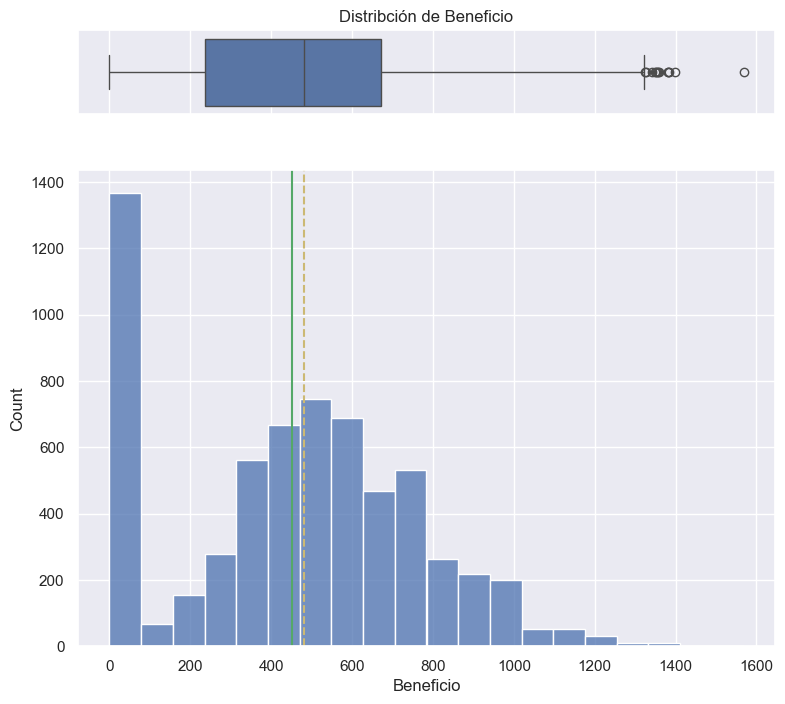

In [15]:
# Crear el histograma y bloxplot
def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(9,8), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(np.random.rand(100), bins = 20, title="Fancy plot")
    """
    # Definir tamaño letra
    sns.set(font_scale=font_scale)
    # Crear ventana para los subgráficos
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    # Crear boxplot
    sns.boxplot(x=data, ax=ax_box2)
    # Crear histograma
    sns.histplot(x=data, ax=ax_hist2, bins=bins) if bins else sns.histplot(x=data, ax=ax_hist2)
    # Pintar una línea con la media
    ax_hist2.axvline(np.mean(data),color='g',linestyle='-')
    # Pintar una línea con la mediana
    ax_hist2.axvline(np.median(data),color='y',linestyle='--')
    # Asignar título y nombre de eje si tal
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title, xlabel="")
    # Mostrar gráfico
    plt.show()

histogram_boxplot(vinos.Beneficio, bins = 20, font_scale=1, title="Distribción de Beneficio")

In [16]:
# Para categóricas
def cat_plot(col):
     if col.dtypes == 'category':
        fig = px.bar(col.value_counts())
        #fig = sns.countplot(x=col)
        fig.update_layout(width=900)
        return(fig)

# Aplicación a una variable en particular    
cat_plot(vinos.Compra)

In [17]:
# Variable Etiqueta
cat_plot(vinos.Etiqueta)

Cont


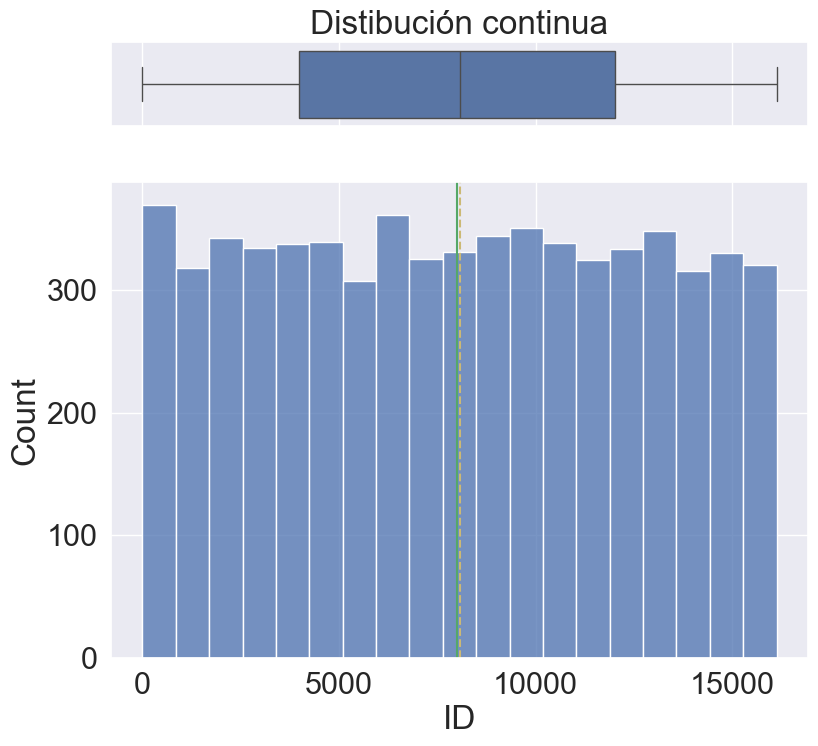

Cont


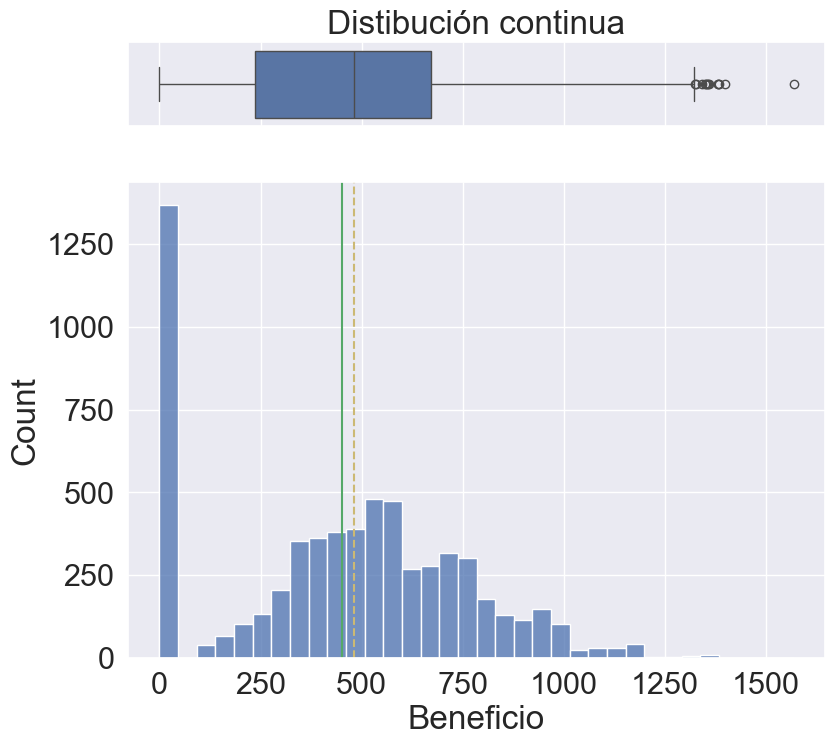

Cat


Cont


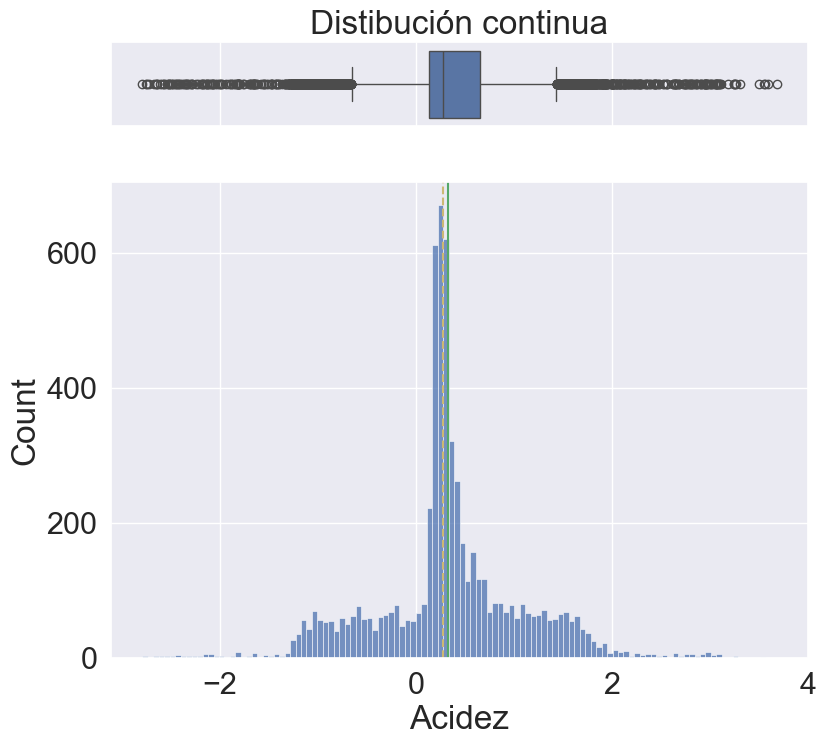

Cont


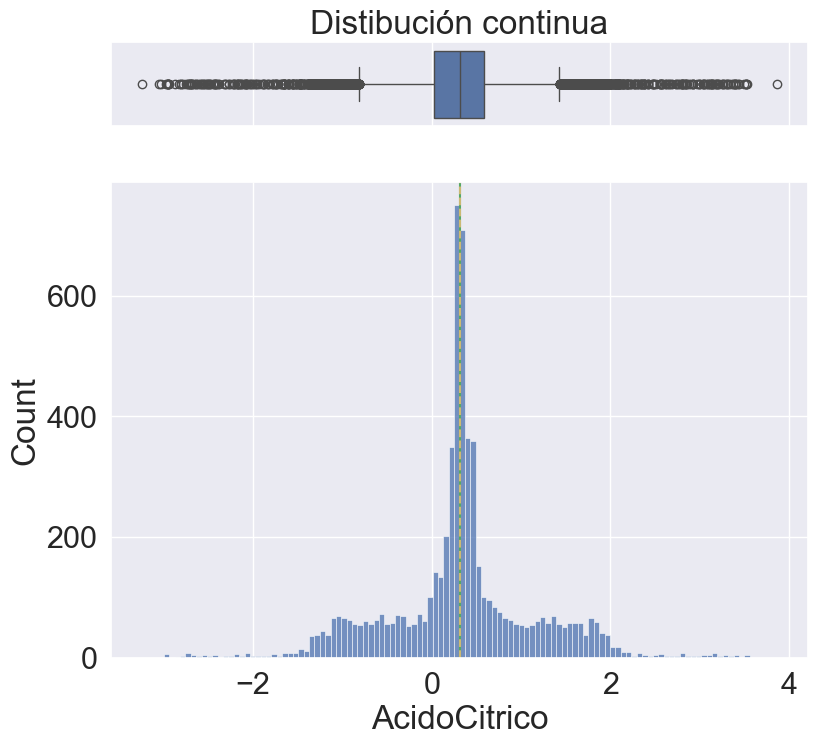

Cont


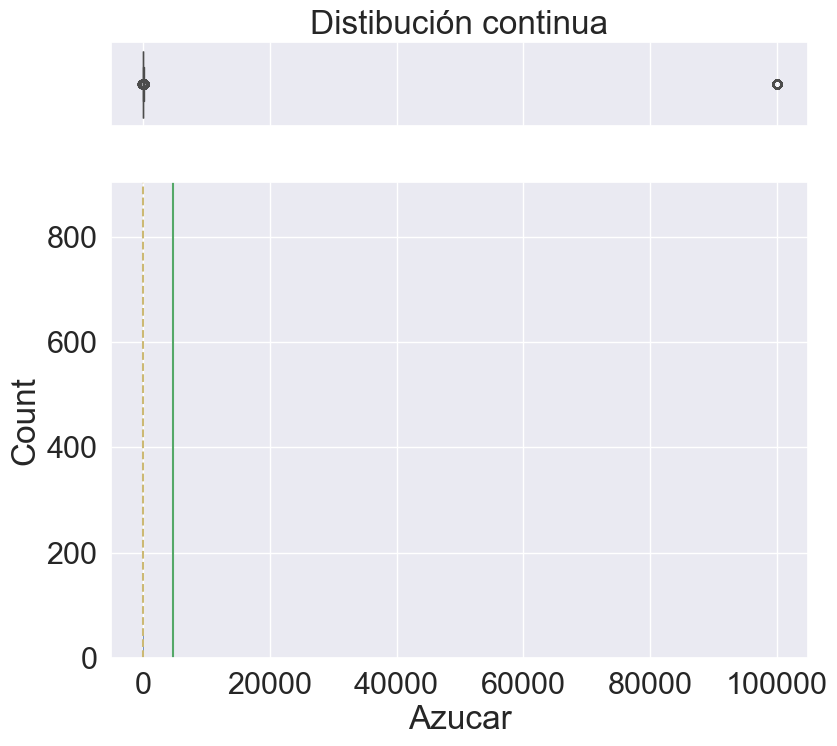

Cont


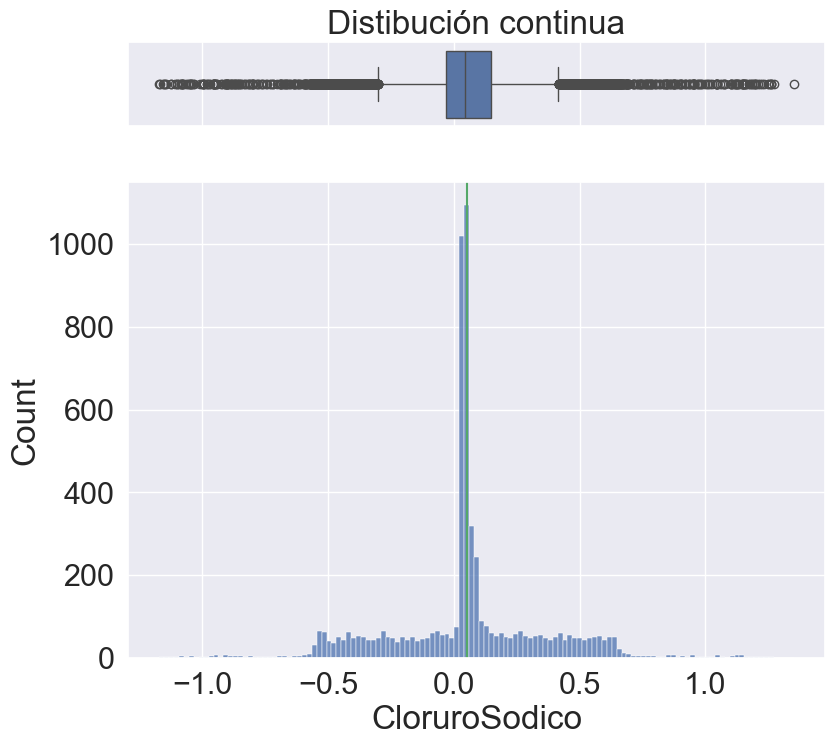

Cont


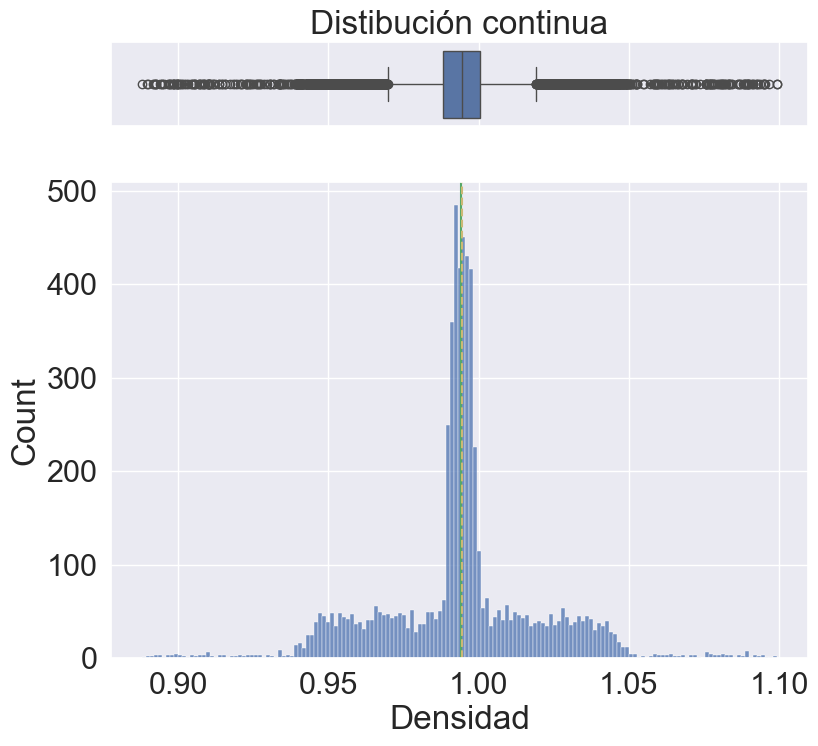

Cont


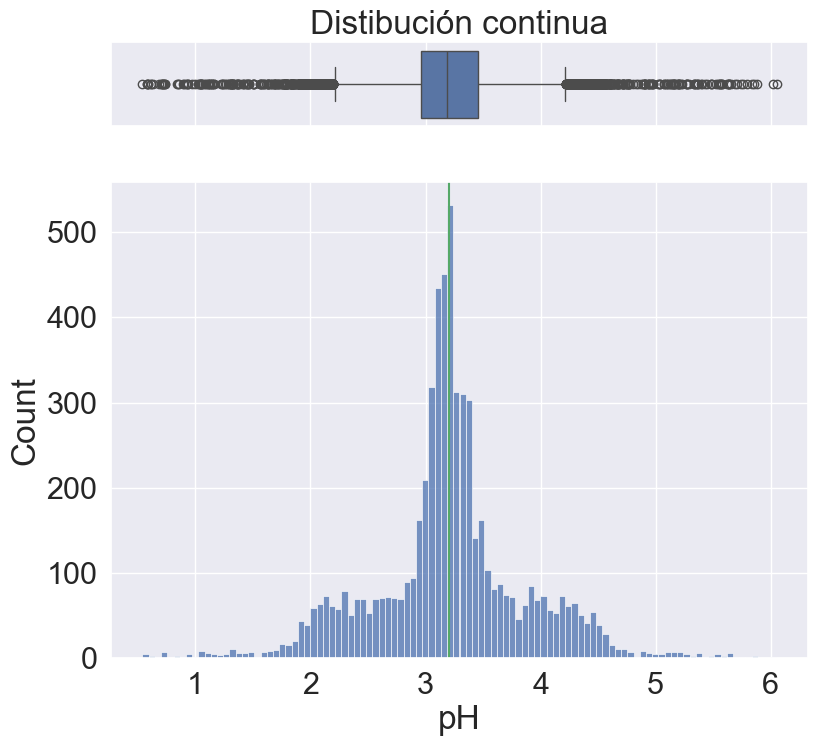

Cont


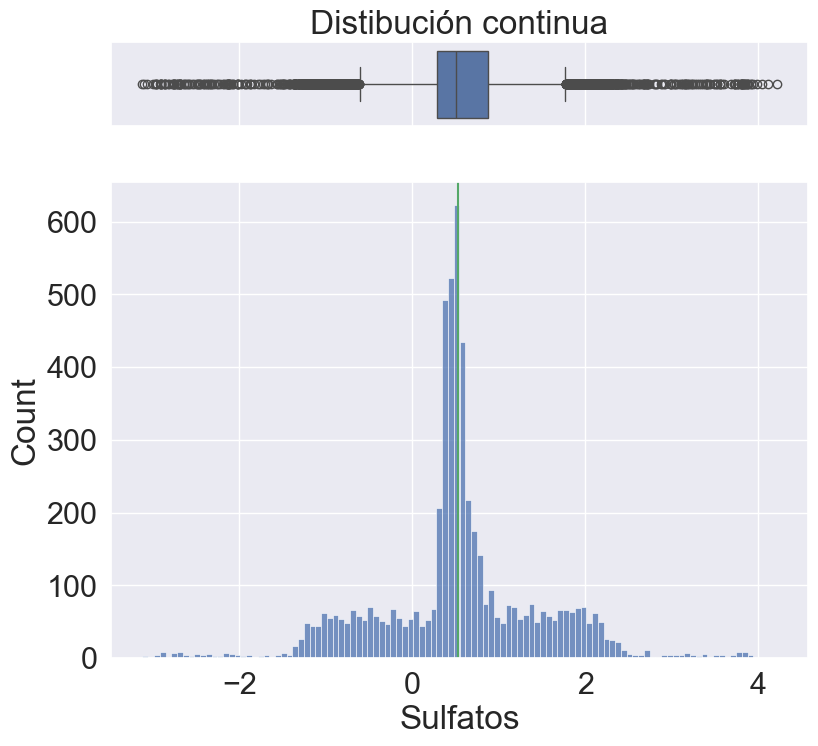

Cont


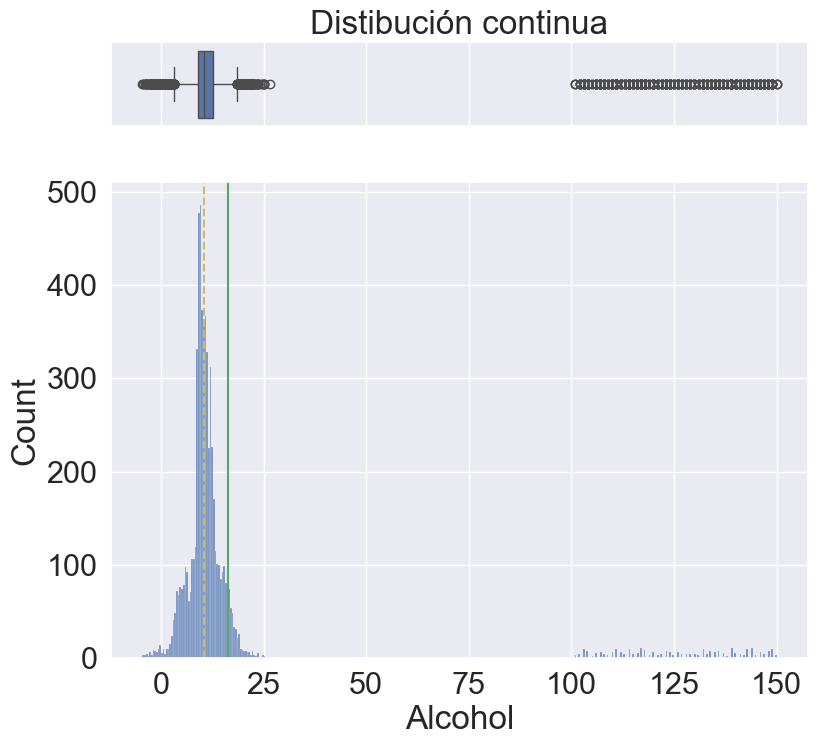

Cat


Cont


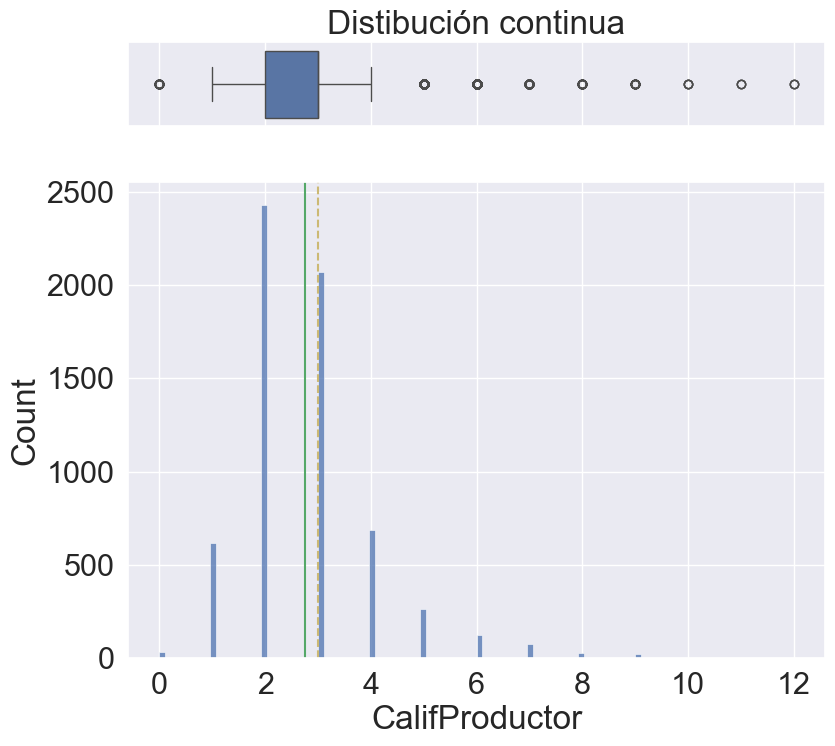

Cat


Cat


Cont


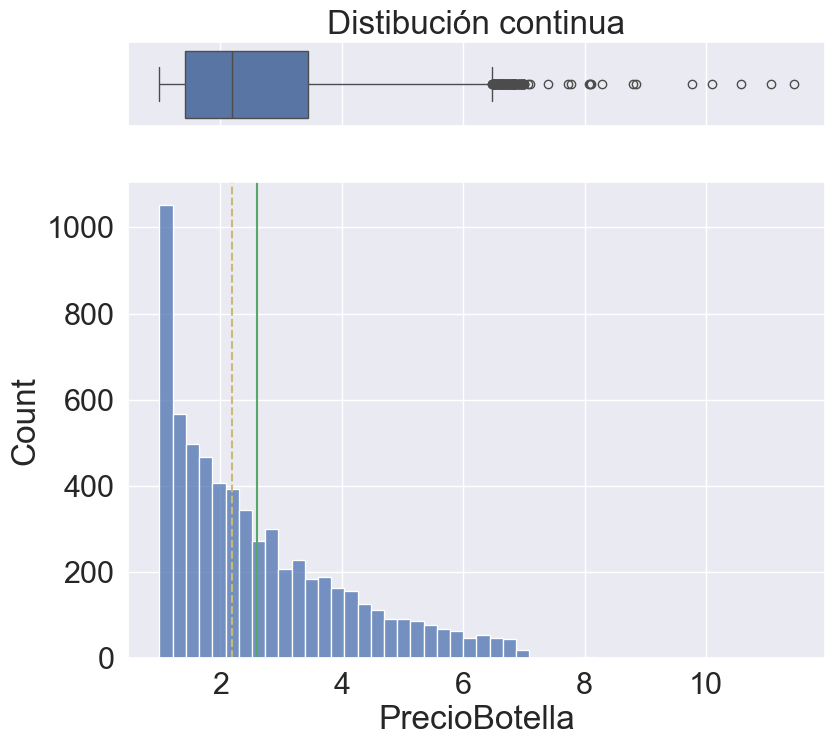

ID                None
Beneficio         None
Compra            None
Acidez            None
AcidoCitrico      None
Azucar            None
CloruroSodico     None
Densidad          None
pH                None
Sulfatos          None
Alcohol           None
Etiqueta          None
CalifProductor    None
Clasificacion     None
Region            None
PrecioBotella     None
dtype: object

In [18]:
# Integrar el proceso en una sola función que pueda ser aplicada a todas o parte de las columnas
def plot(col):
     if col.dtypes != 'category':
        print('Cont')
        histogram_boxplot(col, xlabel = col.name, title = 'Distibución continua')
     else:
        print('Cat')
        cat_plot(col).show()
        
# Aplicar a una serie de columas 1:9 del data
vinos.apply(plot)

# Corrección de errores detectados

In [19]:
# 1. Etiqueta
# Tabla de frecuencias
vinos.Etiqueta.value_counts()

Etiqueta
R     2380
M     1357
B     1282
r      420
m      230
MM     216
b      209
MB     191
mb      40
mm      40
Name: count, dtype: int64

In [20]:
# Utilizar apply con lambda para ver como quedaría el cambio, para dejar todo en mayúscula
vinos['Etiqueta'].apply(lambda x: x.upper()).value_counts(sort=False)

Etiqueta
M     1587
R     2800
B     1491
MB     231
MM     256
Name: count, dtype: int64

In [21]:
# Realizar el cambio en la propia variable y cambiar el tipo a categórica
vinos['Etiqueta'] = vinos['Etiqueta'].str.upper().astype('category')

In [22]:
# Ordenar el factor como nos gustaría tenerlo
vinos["Etiqueta"] = vinos["Etiqueta"].cat.reorder_categories(['MM','M','R','B','MB'])

# A ver como está el tema ahora
vinos.Etiqueta.value_counts()

Etiqueta
R     2800
M     1587
B     1491
MM     256
MB     231
Name: count, dtype: int64

In [23]:
# Tabla de frecuencias sin ordenar por volumen
vinos.Etiqueta.value_counts(sort=False)

Etiqueta
MM     256
M     1587
R     2800
B     1491
MB     231
Name: count, dtype: int64

In [24]:
# 2. Azucar
# Quitamos ese 99999 de la variable Azucar y lo pasamos a NA
vinos['Azucar'] = vinos['Azucar'].replace(99999, np.nan)

In [25]:
# Comprobamos el nuevo máximo
vinos.Azucar.max()

141.15

In [26]:
# 3. Alcohol
# Corregimos valores fuera de rango de Alcohol (recordemos que es un %).

# Opción con .loc de pandas (loc sirve para poner condiciones, volver np.nan todo lo que esté fuera del rango 0 a 100)
vinos.loc[~vinos.Alcohol.between(0, 100), "Alcohol"] = np.nan

In [27]:
# Comprobamos nuevos límites de la variable
vinos.Alcohol.min(),vinos.Alcohol.max()

(0.0, 26.5)

In [28]:
# 4. Clasificación
# Frecuencias de las categorías de clasificación
vinos.Clasificacion.value_counts()

Clasificacion
**      1754
?       1680
*       1535
***     1074
****     322
Name: count, dtype: int64

In [29]:
# Tabla de contingencia con la variable objetivo binaria Compra
pd.crosstab(index=vinos['Compra'], columns=vinos['Clasificacion'])

Clasificacion,*,**,***,****,?
Compra,,,,,
0,306,46,0,0,1015
1,1229,1708,1074,322,665


In [30]:
# Reemplazar los ? por Deconocido pues representa una categoría importante en volumen y con un posible patrón interesante (podría molestar)
vinos['Clasificacion'] = vinos['Clasificacion'].replace('?', 'Desc')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10892\869151843.py:2: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



In [31]:
# Verificar si la columna es de tipo categórico
if vinos['Clasificacion'].dtype.name == 'category':
    # Cambiar '?' a 'Desconocido' en las categorías
    vinos['Clasificacion'] = vinos['Clasificacion'].cat.rename_categories({'?': 'Desconocido'})
else:
    # Si no es categórica, usar replace normalmente
    vinos['Clasificacion'] = vinos['Clasificacion'].replace('?', 'Desconocido')

In [32]:
vinos.Clasificacion.value_counts()

Clasificacion
**      1754
Desc    1680
*       1535
***     1074
****     322
Name: count, dtype: int64

In [33]:
vinos.Region.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6365 entries, 0 to 6364
Series name: Region
Non-Null Count  Dtype   
--------------  -----   
6258 non-null   category
dtypes: category(1)
memory usage: 6.5 KB


In [34]:
# Debo separar las variables objetivo (Beneficio y Compra que son intocables) de las demás variables (que llamaremos imput)
# Indico la variableObj, el ID y las Input. Los atípicos y los missings se gestionan sólo de las input
varObjCont = vinos.Beneficio
varObjBin = vinos.Compra
imput = vinos.drop(['Beneficio','Compra'],axis=1)

In [35]:
# Ver cómo quedan las imput (los predictores continuos y categóricos)
imput.head()

,ID,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella
0,2,0.16,-0.81,26.10,-0.425,1.02792,3.38,0.70,NaN,M,2,***,1.0,1.00
1,4,2.64,-0.88,14.80,0.037,0.99518,3.12,0.48,22.0,M,3,***,3.0,3.38
2,8,0.29,-0.40,21.50,0.060,0.99572,3.49,1.21,10.3,R,3,Desc,1.0,3.72
3,11,-1.22,0.34,1.40,0.040,1.03236,3.20,NaN,11.6,B,2,***,2.0,6.23
4,12,0.27,1.05,11.25,-0.007,0.99620,4.93,0.26,15.0,R,1,Desc,2.0,2.44


# Valores atípicos

In [36]:
# Ver las asimetrías de las variables numéricas continuas
vinos.select_dtypes(include=np.number).apply(lambda x: x.skew())
# Asimetrías en valor absoluto mayores a 1 son signo de distribución significativamente sesgada a la derecha/positiva (+) o izquierda/negativa (-)

ID                0.003339
Beneficio         0.023872
Acidez            0.029079
AcidoCitrico     -0.024261
Azucar            0.022391
CloruroSodico     0.012041
Densidad         -0.009353
pH                0.003311
Sulfatos         -0.062373
Alcohol           0.267099
CalifProductor    1.663553
PrecioBotella     1.120795
dtype: float64

### Winsorizar

In [ ]:
# Crear función gestiona_outliers

In [37]:
## Función manual de winsor con clip+quantile (colapsar la distribución a cierto límite)
def winsorize_with_pandas(s, limits):
    """
    s : pd.Series
        Series to winsorize
    limits : tuple of float
        Tuple of the percentages to cut on each side of the array, 
        with respect to the number of unmasked data, as floats between 0. and 1
    """
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher'))

In [38]:
from scipy import stats # Añadimos en este punto para cargar la librería que ahora hace falta

In [39]:
## Función para gestionar outliers
def gestiona_outliers(col,clas = 'check'):
     print(col.name)
     # Condición de asimetría y aplicación de criterio 1 según el caso
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3
     else:
        criterio1 = abs((col-col.median())/stats.median_abs_deviation(col))>6 ## Cambio mad por median_abs_deviation!! 
     
     # Calcular primer cuartil     
     q1 = col.quantile(0.25)  
     # Calcular tercer cuartil  
     q3 = col.quantile(0.75)
     # Calculo de IQR
     IQR=q3-q1
     # Calcular criterio 2 (general para cualquier asimetría)
     criterio2 = (col<(q1 - 3*IQR))|(col>(q3 + 3*IQR))
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count()
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
     # Salida según el tipo deseado
     if clas == 'check':
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'winsor':
            return(winsorize_with_pandas(col,(lower,upper)))
     elif clas == 'miss':
            print('\n MissingAntes: ' + str(col.isna().sum()))
            col.loc[criterio1&criterio2] = np.nan
            print('MissingDespues: ' + str(col.isna().sum()) +'\n')
            return(col)

In [40]:
# Llamada en modo check
imput.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x)) # Hasta aquí se ve bien pues la gestión de outliers no llega al 2%

ID
Acidez
AcidoCitrico
Azucar
CloruroSodico
Densidad
pH
Sulfatos
Alcohol
CalifProductor
PrecioBotella


,ID,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella
0,0.0,0.816968,0.848390,0.956307,0.807781,0.942655,0.794165,1.024128,0.000000,0.000000,0.000000
1,0.0,0.879811,0.785546,0.972795,0.873722,0.942655,0.696921,0.815831,0.317885,0.157109,0.078555
2,0.0,1.696779,1.633936,1.929101,1.681503,1.885310,1.491086,1.839958,0.317885,0.157109,0.078555


In [ ]:
# La gestión de outliers aplica únicamente a variables de tipo numérico por lo que podemos crear el subconjunto de estas variables, tratarlas y posteriormente volver a juntar con las categóricas

In [41]:
# Crear copia para evitar pisar información. Creo vinCont con las variables continuas
vinCont = imput.select_dtypes(include=np.number).copy()

In [42]:
# Aplicar la gestión de outliers en modelo Winsor
vinos_winsor = vinCont.apply(lambda x: gestiona_outliers(x,clas='winsor'))

ID
Acidez
AcidoCitrico
Azucar
CloruroSodico
Densidad
pH
Sulfatos
Alcohol
CalifProductor
PrecioBotella


Cont


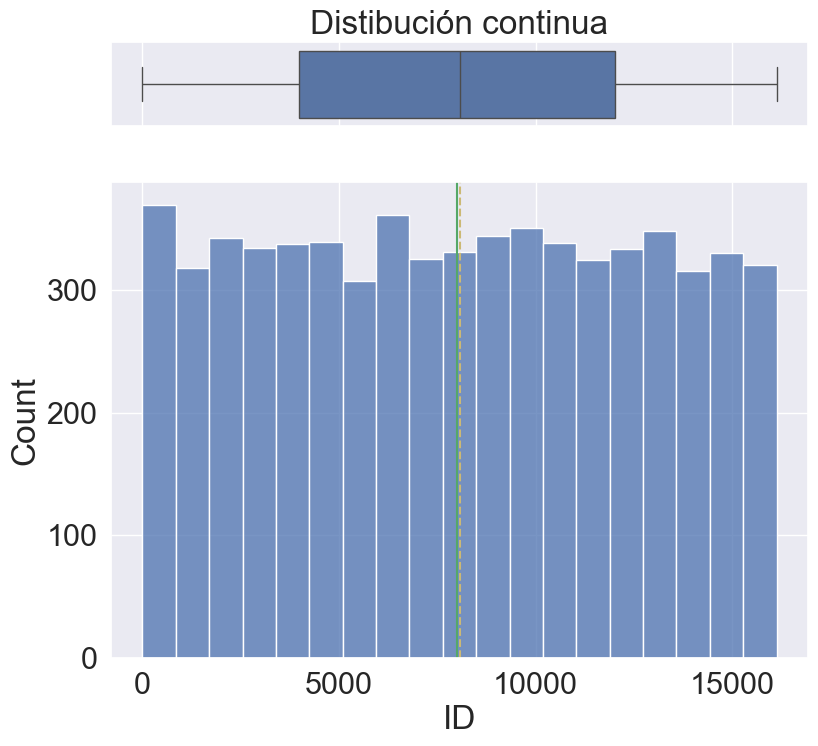

Cont


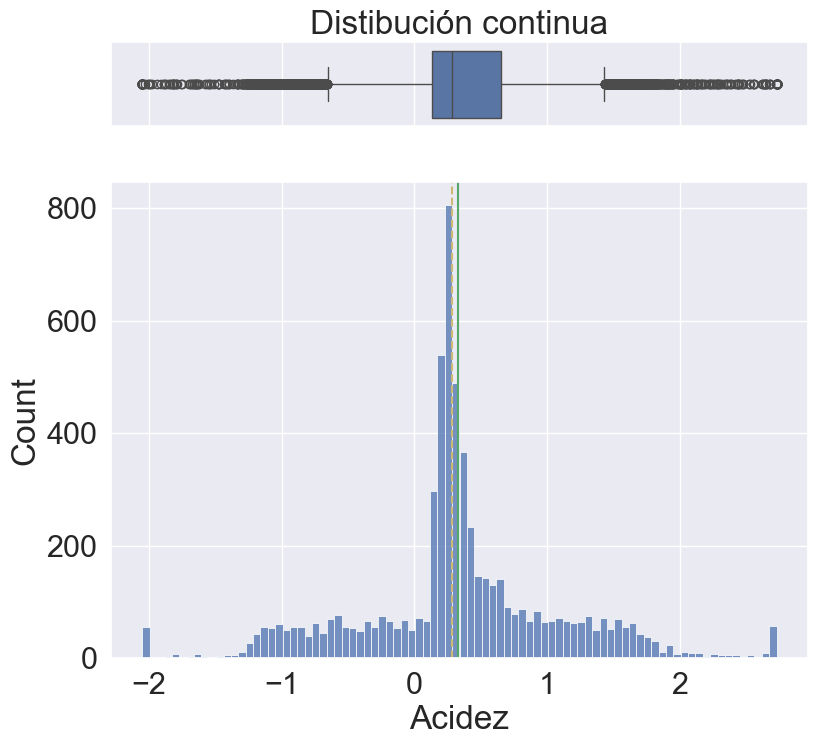

Cont


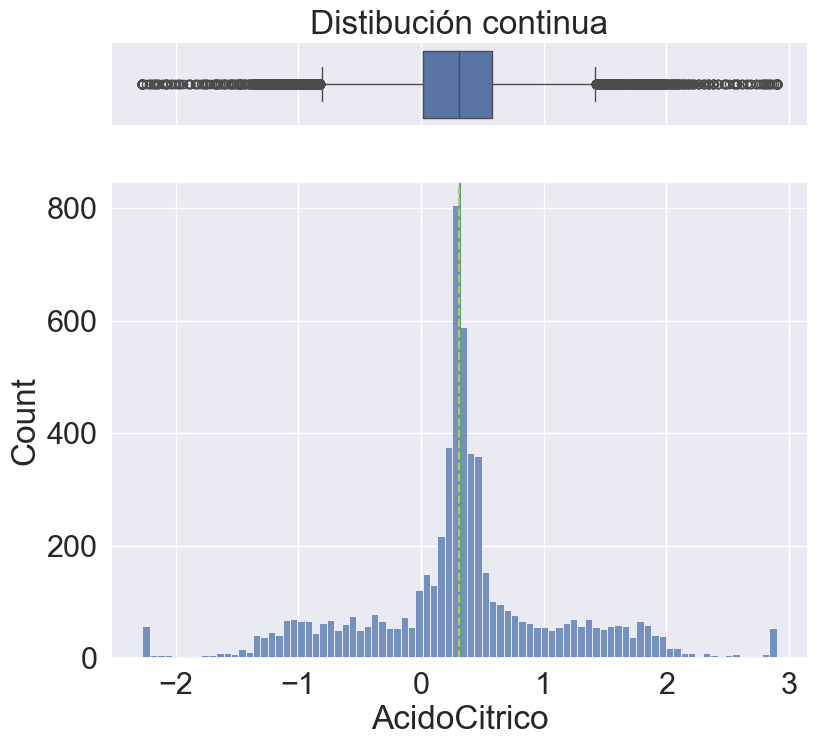

Cont


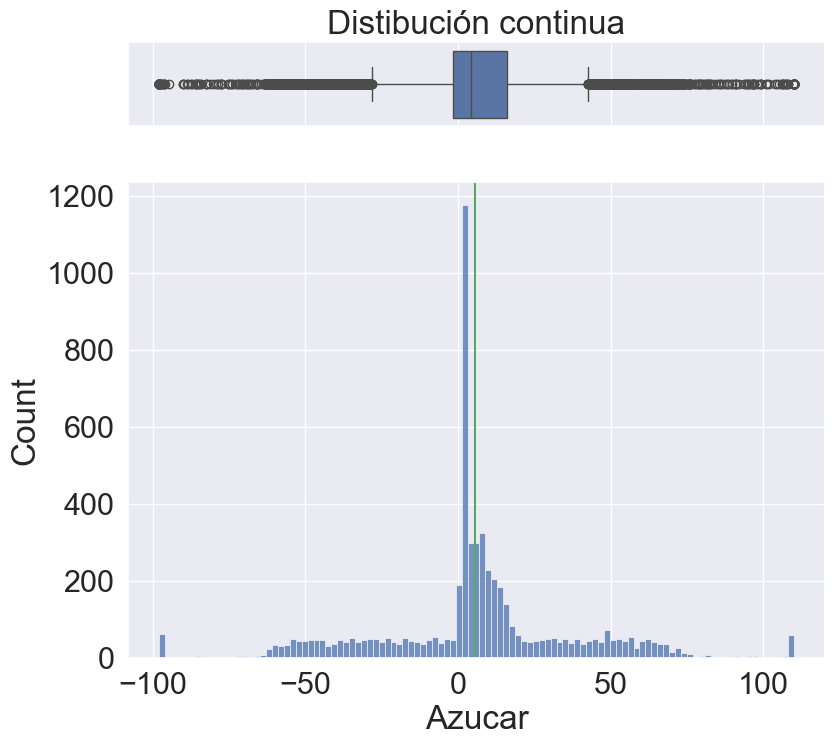

Cont


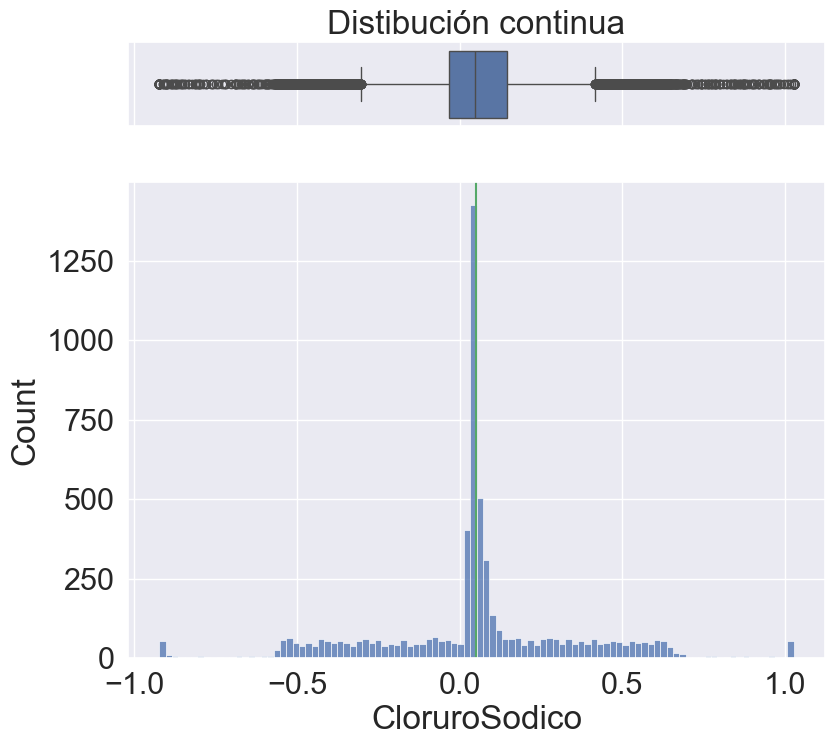

Cont


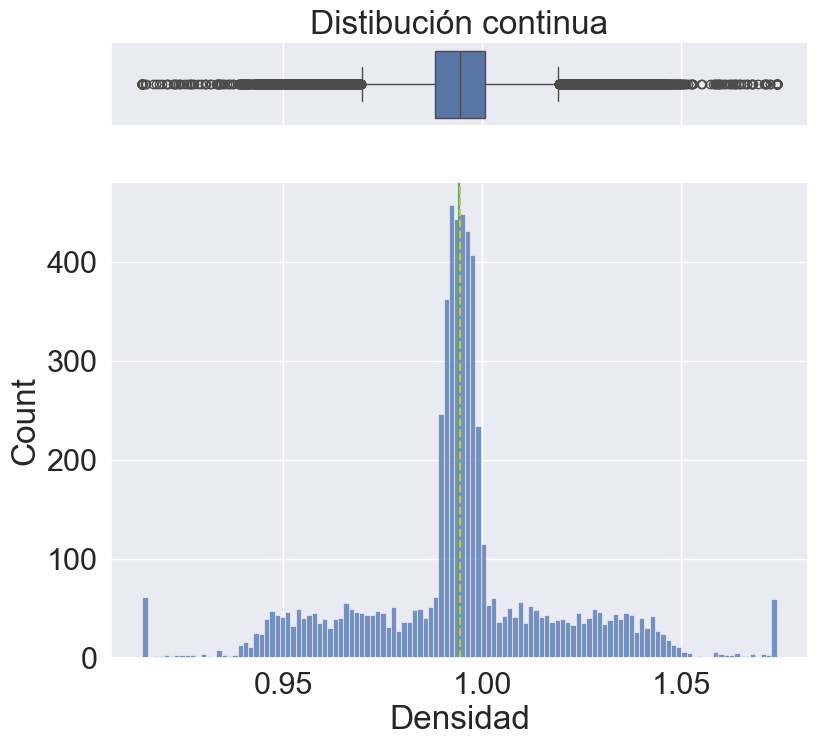

Cont


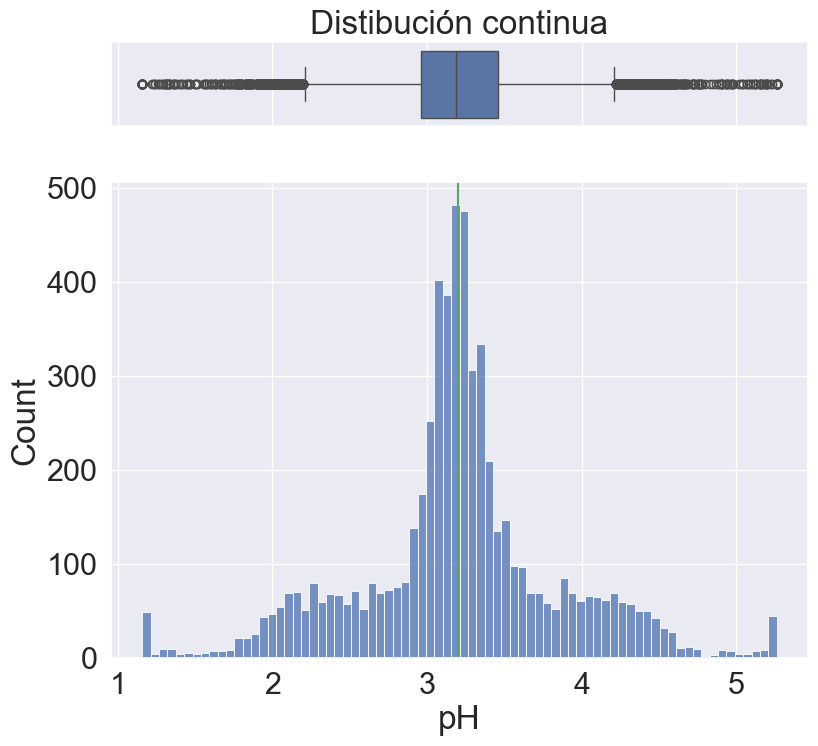

Cont


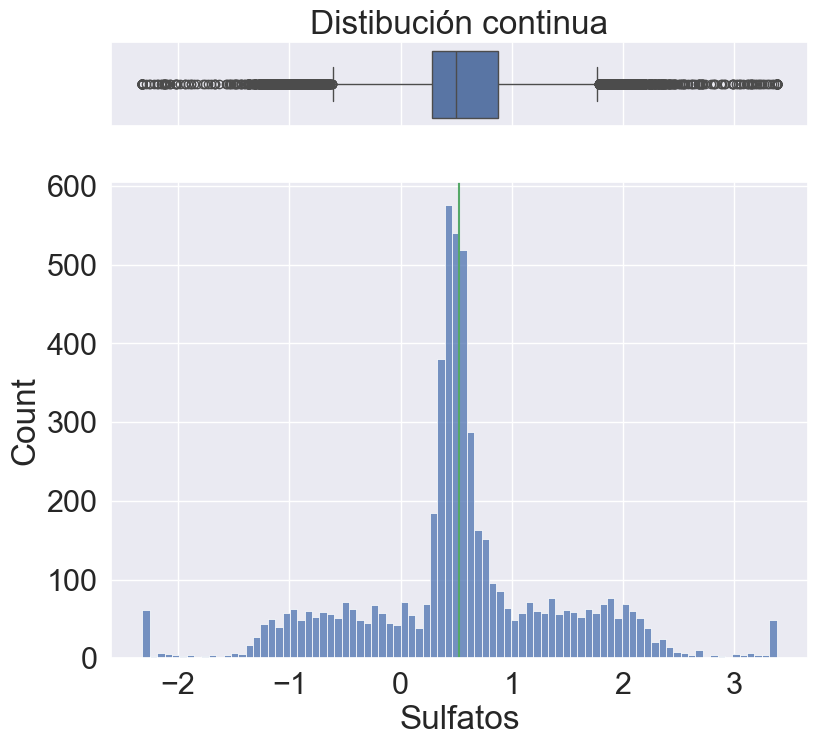

Cont


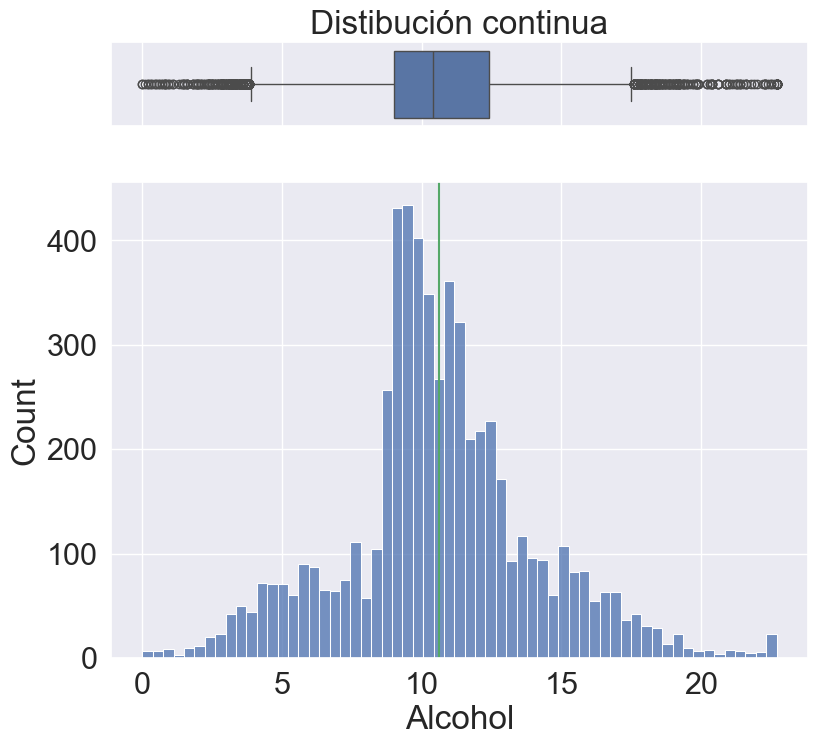

Cont


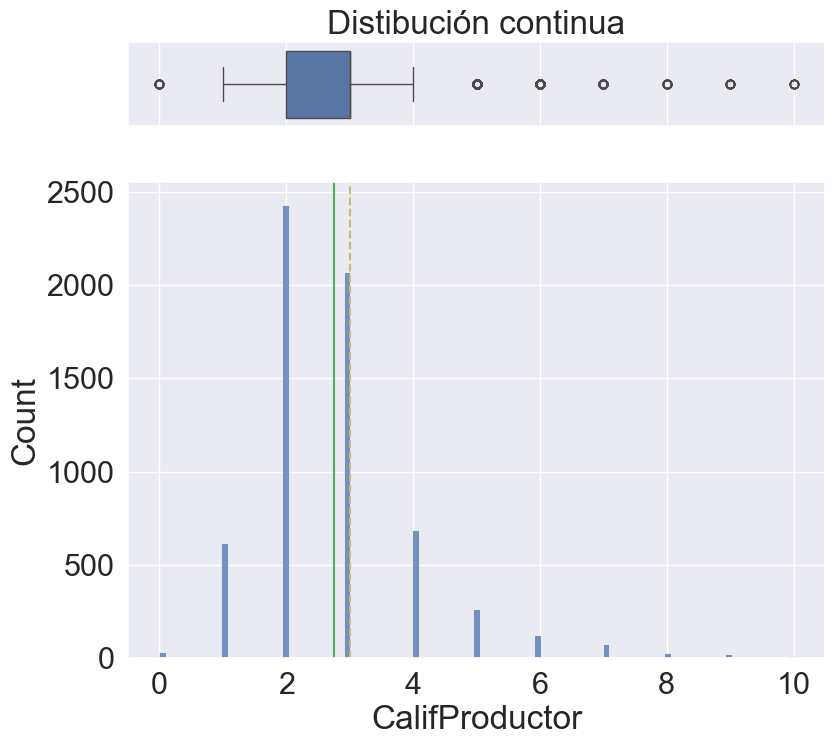

Cont


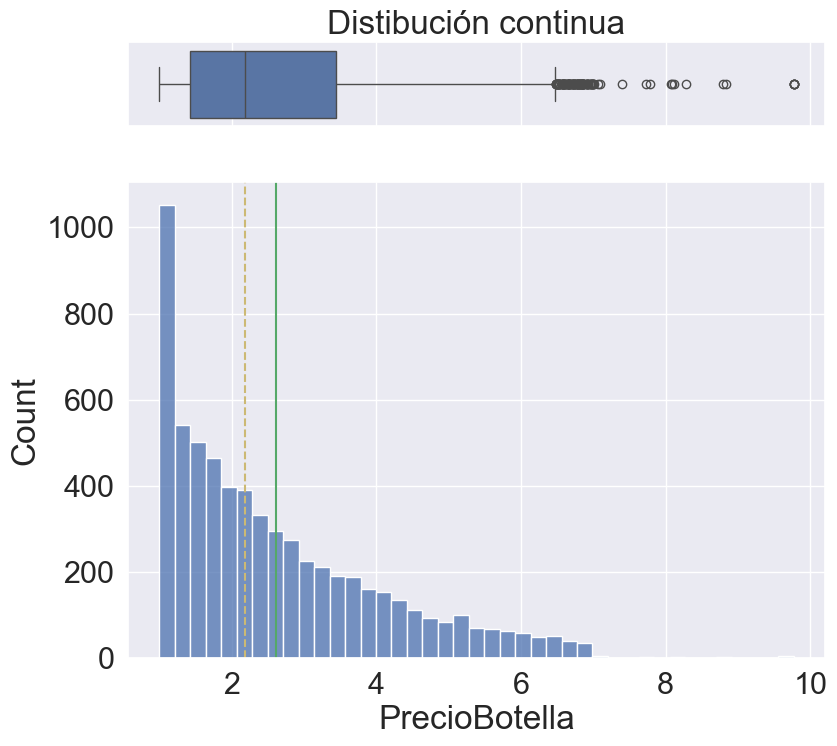

ID                None
Acidez            None
AcidoCitrico      None
Azucar            None
CloruroSodico     None
Densidad          None
pH                None
Sulfatos          None
Alcohol           None
CalifProductor    None
PrecioBotella     None
dtype: object

In [43]:
vinos_winsor.apply(plot)

In [44]:
# Contemos si ha desaparecido algún resgitro o algo 
vinos_winsor.apply(lambda x: x.isna().sum()/x.count()*100)

ID                 0.000000
Acidez             0.000000
AcidoCitrico       0.000000
Azucar             4.946414
CloruroSodico      4.929113
Densidad           0.000000
pH                 3.160454
Sulfatos          10.484291
Alcohol            6.491551
CalifProductor     0.000000
PrecioBotella      0.000000
dtype: float64

In [45]:
# Veamos los valores mínimos de acidez ahora
vinos_winsor.sort_values(by='Acidez').head() # Todos los valores que en Acidez eran menores a -2.05 colapsaron a -2.05

,ID,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella
3529,8900,-2.05,-0.75,-15.8,0.089,1.01463,3.49,0.62,10.8,1,2.37
3822,9593,-2.05,0.82,7.0,0.046,0.99454,4.53,0.70,10.4,2,1.75
945,2344,-2.05,0.20,47.0,0.486,0.98456,3.38,-0.08,9.4,3,3.43
2516,6352,-2.05,-0.09,-32.5,-0.569,0.94870,3.31,0.42,13.7,2,3.56
5768,14573,-2.05,-1.96,9.7,-0.165,0.99610,3.42,NaN,11.5,3,1.31


In [46]:
# Veamos los valores mínimos de acidez de antes
vinos.sort_values(by='Acidez').head() # con vinos original me da Acidez de -2.79 (es menor que el percentil de colapso -2.05)

,ID,Beneficio,Compra,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,Etiqueta,CalifProductor,Clasificacion,Region,PrecioBotella
6083,15379,428,1,-2.790,1.87,18.80,0.023,0.99062,2.92,3.73,12.1,M,4,Desc,3.0,1.93
5892,14914,409,1,-2.750,0.37,1.65,0.602,0.99973,3.11,1.04,11.4,R,2,***,1.0,1.01
6262,15860,926,1,-2.745,1.82,32.80,0.035,1.00808,3.17,0.55,15.0,B,2,***,2.0,1.29
1867,4664,351,1,-2.720,1.62,-31.20,0.040,0.99026,6.05,0.39,4.7,R,1,Desc,3.0,2.29
2968,7495,407,1,-2.670,3.34,13.30,0.060,0.99820,2.80,1.36,15.2,R,3,**,3.0,1.00


In [47]:
# Juntar variables numéricas y factores (categóricas) en un solo archivo para valorar la incidencia de perdidos en el conjunto completo.
# Juntar columnas con join
imput_wins = vinos_winsor.join(imput.select_dtypes(exclude=np.number))
imput_wins.head()

,ID,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella,Etiqueta,Clasificacion,Region
0,2,0.16,-0.81,26.10,-0.425,1.02792,3.38,0.70,NaN,2,1.00,M,***,1.0
1,4,2.64,-0.88,14.80,0.037,0.99518,3.12,0.48,22.0,3,3.38,M,***,3.0
2,8,0.29,-0.40,21.50,0.060,0.99572,3.49,1.21,10.3,3,3.72,R,Desc,1.0
3,11,-1.22,0.34,1.40,0.040,1.03236,3.20,NaN,11.6,2,6.23,B,***,2.0
4,12,0.27,1.05,11.25,-0.007,0.99620,4.93,0.26,15.0,1,2.44,R,Desc,2.0


# Valores perdidos

### Valorar la incidencia.

In [ ]:
# Vamos a actuar por dos vías, filas y columnas para contar el % de perdidos en cada registro y en cada variable. 

In [48]:
# Proporción de missings por variable 
imput_wins.apply(lambda x: x.isna().sum()/imput_wins.shape[0]*100) # Sulfatos puede ser peligrosa pues tiene casi 10% de perdidos

ID                0.000000
Acidez            0.000000
AcidoCitrico      0.000000
Azucar            4.713276
CloruroSodico     4.697565
Densidad          0.000000
pH                3.063629
Sulfatos          9.489395
Alcohol           6.095837
CalifProductor    0.000000
PrecioBotella     0.000000
Etiqueta          0.000000
Clasificacion     0.000000
Region            1.681068
dtype: float64

In [49]:
# Proporción de missings por observación (como una nueva columna del dataset) esta vez en valor absoluto
imput_wins['prop_missings'] = imput_wins.apply(lambda x: x.isna().sum(),axis=1)

# Valoramos distribución 
imput_wins.prop_missings.describe() # como mucho, de todas las columnas que tengo al menos 3 están perdidas

count    6365.000000
mean        0.297408
std         0.531238
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: prop_missings, dtype: float64

In [50]:
# Proporción de missings por observación (como una nueva columna del dataset) esta en porcentual
imput_wins['prop_missings'] = imput_wins.apply(lambda x: x.isna().sum()/imput_wins.shape[1]*100,axis=1)

# Valoramos distribución
imput_wins.prop_missings.describe() # como mucho, el 21% de las columnas están perdidas

count    6365.000000
mean        1.982718
std         3.541585
min         0.000000
25%         0.000000
50%         0.000000
75%         6.666667
max        20.000000
Name: prop_missings, dtype: float64

In [51]:
# Ordenar el archivo por la nueva variable creada para ver el aspecto
imput_wins.sort_values(by='prop_missings', ascending=False).head()

,ID,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella,Etiqueta,Clasificacion,Region,prop_missings
2781,6990,1.40,0.30,NaN,NaN,1.04263,4.00,NaN,15.1,3,1.30,R,**,2.0,20.0
1344,3341,0.26,0.27,18.2,0.048,1.04227,NaN,NaN,3.8,1,2.62,B,**,NaN,20.0
5402,13598,-0.45,0.26,NaN,NaN,0.99907,2.21,0.68,NaN,3,3.10,M,Desc,1.0,20.0
4385,11020,0.27,-0.01,NaN,0.295,0.99566,NaN,-0.46,NaN,3,2.35,R,**,2.0,20.0
1352,3357,1.02,1.51,NaN,NaN,0.99300,3.37,0.55,11.5,2,1.60,MB,Desc,NaN,20.0


## Coexistencia y patrones de missings

In [52]:
import missingno as msno 

<Axes: >

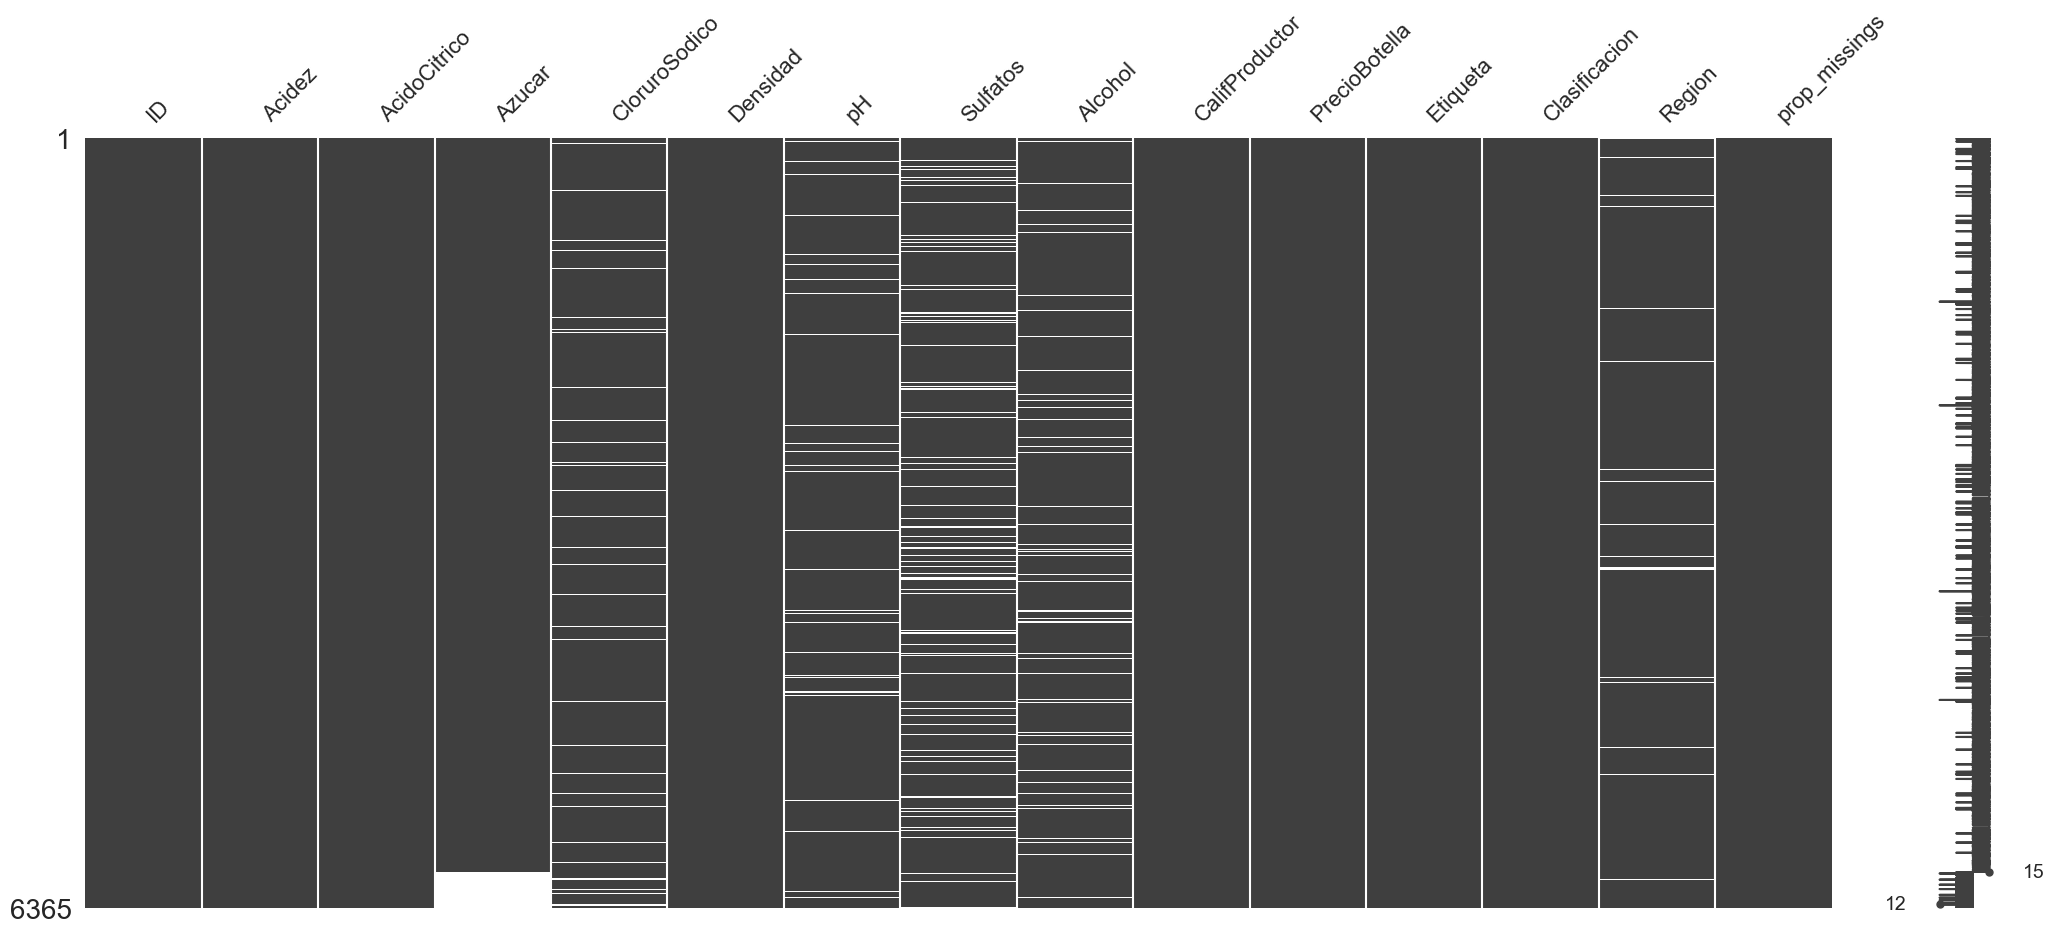

In [ ]:
# Plot correlation heatmap of missingness
msno.matrix(imput_wins.sort_values(by='Azucar'))

<Axes: >

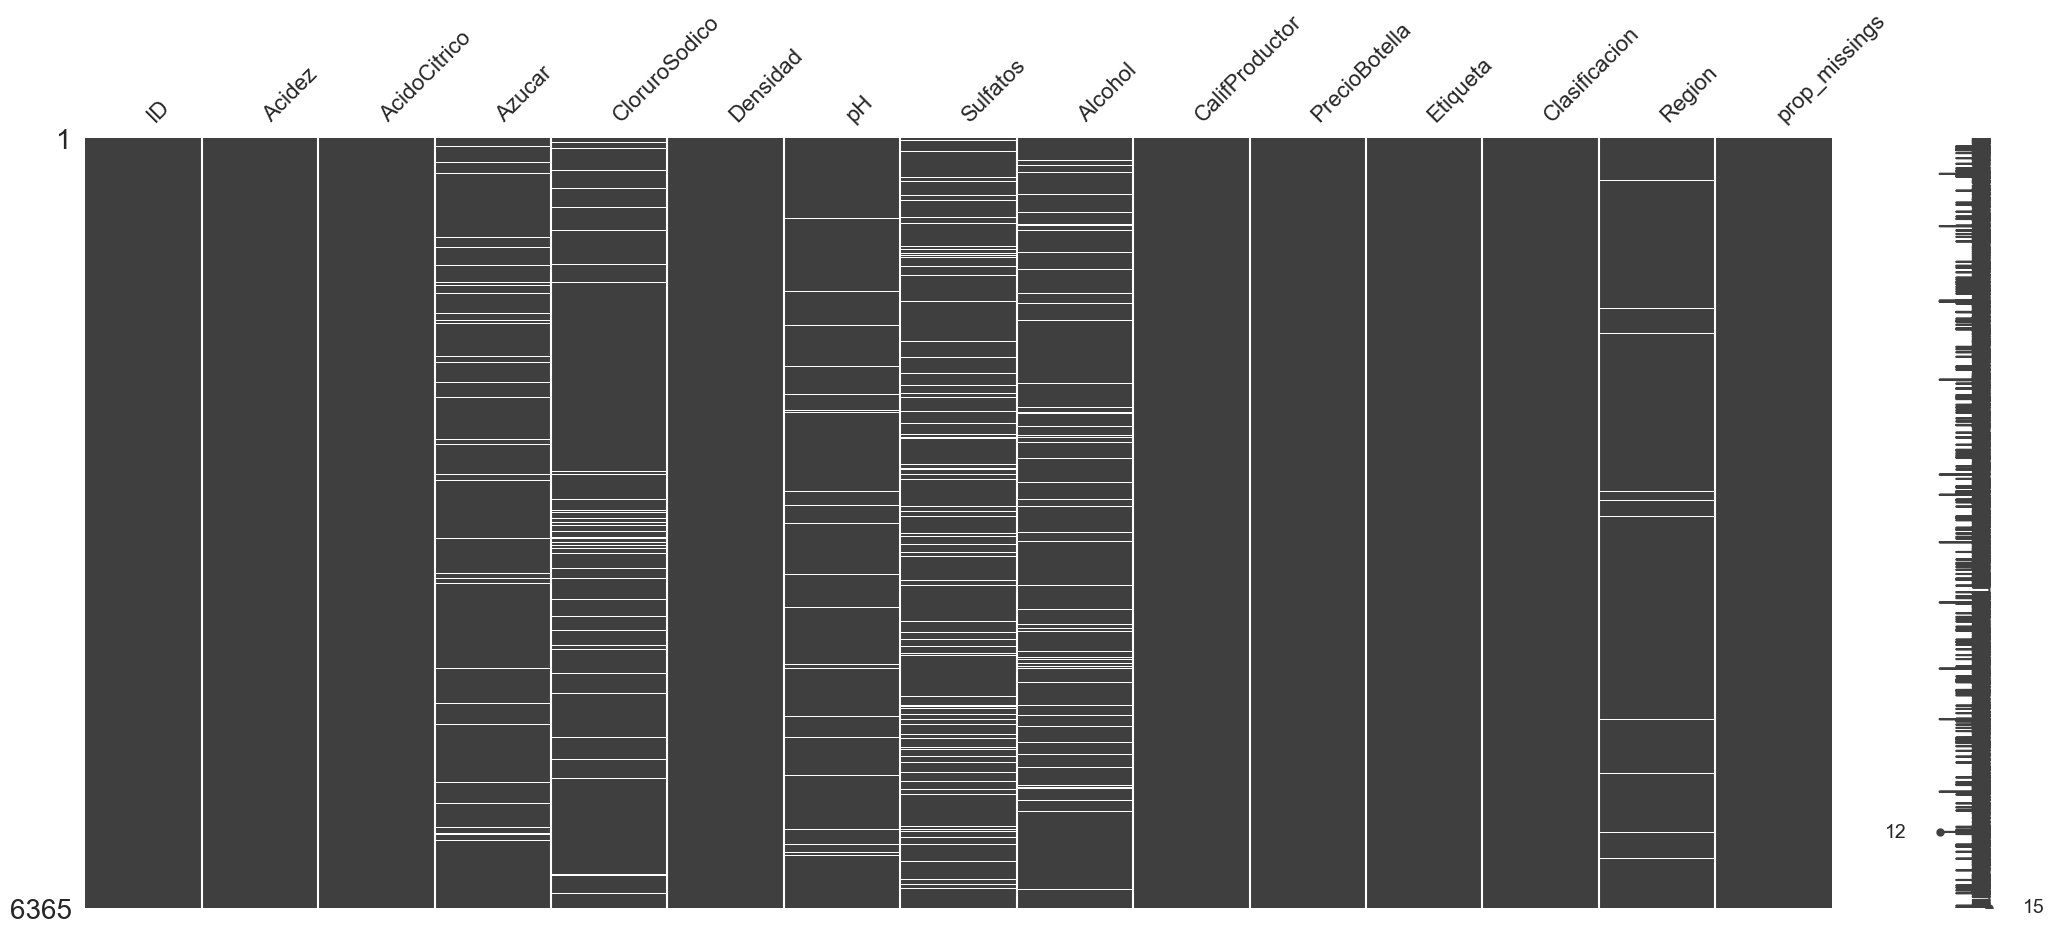

In [54]:
# Plot correlation heatmap of missingness
msno.matrix(imput_wins)

<Axes: >

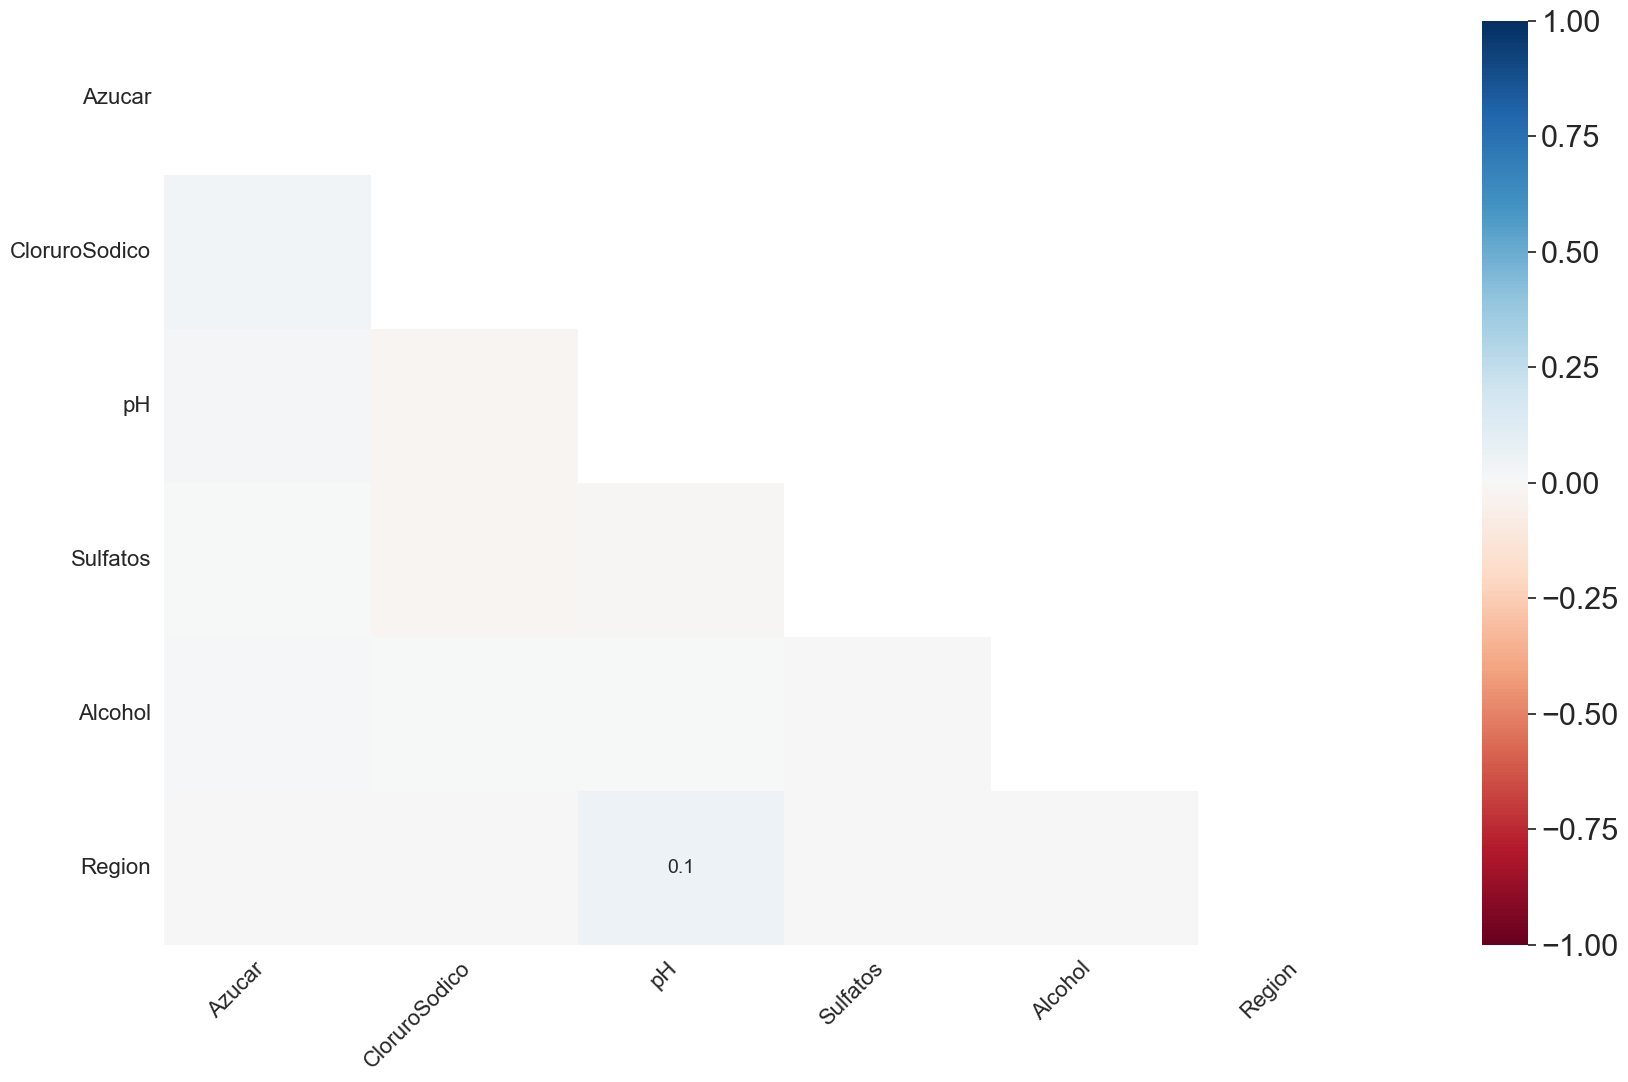

In [ ]:
# Ver en el mapa de calor que representa el valor de correlación en la matriz 0-1 de aparación o no de perdidos en cada registro-variable.
msno.heatmap(imput_wins) # Muestra relaciones muy débiles con ese máximo de 0.1 para pH con Región

# Imputaciones

In [56]:
# Ver qué pasaría si elimináramos los NAs por lista del dataset?. Cuántas observaciones perderíamos?
imput_wins.dropna().describe() # Nos quedamos con 4692 registros en total para todas las variables, lo que supone un 73% de la información, perdiendo 27% de registros.

,ID,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella,prop_missings
count,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.000000,4692.0
mean,7996.172421,0.328698,0.324275,5.772730,0.054077,0.994302,3.193555,0.528664,10.583355,2.762788,2.609514,0.0
std,4671.828755,0.767945,0.833961,33.751459,0.317515,0.025600,0.664272,0.930072,3.486016,1.309899,1.478646,0.0
min,4.000000,-2.050000,-2.270000,-97.800000,-0.923000,0.914730,1.160000,-2.320000,0.000000,0.000000,1.000000,0.0
25%,3917.750000,0.130000,0.030000,-1.700000,-0.029000,0.988540,2.960000,0.290000,9.000000,2.000000,1.420000,0.0
50%,8071.000000,0.280000,0.310000,4.100000,0.046000,0.994400,3.190000,0.500000,10.400000,3.000000,2.180000,0.0
75%,12026.250000,0.650000,0.580000,16.125000,0.152250,1.000705,3.460000,0.880000,12.400000,3.000000,3.430000,0.0
max,16111.000000,2.730000,2.900000,109.900000,1.027000,1.073900,5.260000,3.380000,22.700000,10.000000,9.770000,0.0


In [57]:
# Uso de paquetes sklearn y feature_engine para imputaciones simples y multivariantes de varios tipos
import sklearn.impute as skl_imp
from sklearn.experimental import enable_iterative_imputer

In [58]:
# Moda: Solo nominales
imputer_moda = skl_imp.SimpleImputer(strategy='most_frequent', missing_values=np.nan)
# knn: Solo numéricas
imputer_knn = skl_imp.KNNImputer(n_neighbors=3)
# Chain equations: solo numéricas
imputer_itImp = skl_imp.IterativeImputer(max_iter=10, random_state=0)

In [61]:
import feature_engine.imputation as fe_imp

# Aleatoria: numéricas y nominales
imputer_rand = fe_imp.RandomSampleImputer()
# Mediana: solo numéricas
imputer_median = fe_imp.MeanMedianImputer(imputation_method='median')
# Media: solo numericas
imputer_mean = fe_imp.MeanMedianImputer(imputation_method='mean')

In [62]:
# Separaremos el dataset de nuevo en continuas y categóricas para aplicar los métodos que correspondan
imput_wins_cont = imput_wins.select_dtypes(include=np.number)
imput_wins_cat = imput_wins.select_dtypes(exclude=np.number)
imput_wins_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6365 entries, 0 to 6364
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              6365 non-null   int64  
 1   Acidez          6365 non-null   float64
 2   AcidoCitrico    6365 non-null   float64
 3   Azucar          6065 non-null   float64
 4   CloruroSodico   6066 non-null   float64
 5   Densidad        6365 non-null   float64
 6   pH              6170 non-null   float64
 7   Sulfatos        5761 non-null   float64
 8   Alcohol         5977 non-null   float64
 9   CalifProductor  6365 non-null   int64  
 10  PrecioBotella   6365 non-null   float64
 11  prop_missings   6365 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 596.8 KB


## Posibilidades para las numéricas

### 1. Nivel univariante. Con media o mediana

In [63]:
# Media
vinos_winsor_mean_imputed = imputer_mean.fit(imput_wins_cont).transform(imput_wins_cont)
print(vinos_winsor_mean_imputed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6365 entries, 0 to 6364
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              6365 non-null   int64  
 1   Acidez          6365 non-null   float64
 2   AcidoCitrico    6365 non-null   float64
 3   Azucar          6365 non-null   float64
 4   CloruroSodico   6365 non-null   float64
 5   Densidad        6365 non-null   float64
 6   pH              6365 non-null   float64
 7   Sulfatos        6365 non-null   float64
 8   Alcohol         6365 non-null   float64
 9   CalifProductor  6365 non-null   int64  
 10  PrecioBotella   6365 non-null   float64
 11  prop_missings   6365 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 596.8 KB
None


In [64]:
# Mediana
vinos_winsor_median_imputed = imputer_median.fit(imput_wins_cont).transform(imput_wins_cont)
print(vinos_winsor_median_imputed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6365 entries, 0 to 6364
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              6365 non-null   int64  
 1   Acidez          6365 non-null   float64
 2   AcidoCitrico    6365 non-null   float64
 3   Azucar          6365 non-null   float64
 4   CloruroSodico   6365 non-null   float64
 5   Densidad        6365 non-null   float64
 6   pH              6365 non-null   float64
 7   Sulfatos        6365 non-null   float64
 8   Alcohol         6365 non-null   float64
 9   CalifProductor  6365 non-null   int64  
 10  PrecioBotella   6365 non-null   float64
 11  prop_missings   6365 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 596.8 KB
None


### 2. Nivel multivariante. Con KNN

In [ ]:
# Fit/transform
imput_wins_knn_imputed = pd.DataFrame(imputer_knn.fit_transform(imput_wins_cont),columns=imput_wins_cont.columns)
imput_wins_itImp_imputed = pd.DataFrame(imputer_itImp.fit_transform(imput_wins_cont),columns=imput_wins_cont.columns)

In [ ]:
# Ver cómo quedan
imput_wins_knn_imputed.info()
imput_wins_itImp_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6365 entries, 0 to 6364
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              6365 non-null   float64
 1   Acidez          6365 non-null   float64
 2   AcidoCitrico    6365 non-null   float64
 3   Azucar          6365 non-null   float64
 4   CloruroSodico   6365 non-null   float64
 5   Densidad        6365 non-null   float64
 6   pH              6365 non-null   float64
 7   Sulfatos        6365 non-null   float64
 8   Alcohol         6365 non-null   float64
 9   CalifProductor  6365 non-null   float64
 10  PrecioBotella   6365 non-null   float64
 11  prop_missings   6365 non-null   float64
dtypes: float64(12)
memory usage: 596.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6365 entries, 0 to 6364
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              63

## Posibilidades para las nominales

In [67]:
# Moda
imput_wins_moda_imputed = pd.DataFrame(imputer_moda.fit_transform(imput_wins_cat),columns=imput_wins_cat.columns)

In [ ]:
# Generar el dataset de configuración personalizada de imputaciones juntando las columnas numéricas imputadas con las categóricas imputadas.

In [68]:
# Ejemplo de creación del data depurado con la configuración seleccionada KNN+MODA
vinos_wins_knn_moda = pd.concat([imput_wins_knn_imputed,imput_wins_moda_imputed,varObjCont,varObjBin], axis=1)
vinos_wins_knn_moda.describe()

,ID,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella,prop_missings,Beneficio
count,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000
mean,8010.702278,0.331342,0.315038,5.648267,0.051567,0.994214,3.201881,0.530793,10.637093,2.760094,2.610008,1.982718,452.380204
std,4654.939139,0.769865,0.842346,33.091090,0.311108,0.025679,0.657861,0.895207,3.439683,1.310444,1.476877,3.541585,308.380542
min,2.000000,-2.050000,-2.270000,-97.800000,-0.923000,0.914730,1.160000,-2.320000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3980.000000,0.130000,0.020000,-2.800000,-0.036000,0.988245,2.960000,0.276667,9.000000,2.000000,1.420000,0.000000,236.000000
50%,8065.000000,0.280000,0.310000,4.100000,0.046000,0.994400,3.190000,0.500000,10.400000,3.000000,2.190000,0.000000,480.000000
75%,12027.000000,0.650000,0.580000,16.100000,0.148333,1.000600,3.460000,0.880000,12.400000,3.000000,3.440000,6.666667,671.000000
max,16128.000000,2.730000,2.900000,109.900000,1.027000,1.073900,5.260000,3.380000,22.700000,10.000000,9.770000,20.000000,1568.000000


In [69]:
vinos_wins_knn_moda.describe(exclude=np.number)

,Etiqueta,Clasificacion,Region,Compra
count,6365,6365,6365.0,6365
unique,5,5,3.0,2
top,R,**,3.0,1
freq,2800,1754,2239.0,4998


In [70]:
# Guardar el archivo depurado junto con las variables objetivo para poder utilizarlo en la fase de creación de modelos predictivos.
# Guardar archivo knn+moda
vinos_wins_knn_moda.to_csv(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MINERÍA DE DATOS Y MODELACIÓN ejercicios\1. Ejercicio base datos vino\script_base_vinos\DatosVinoDep_winsKnnModa.csv')

## Imputación aleatoria para todo tipo de variables

In [71]:
# Aplicar random a nivel general ya que acepta todo tipo.
imput_wins_rand_imputed = imputer_rand.fit(imput_wins).transform(imput_wins)
imput_wins_rand_imputed.describe()

,ID,Acidez,AcidoCitrico,Azucar,CloruroSodico,Densidad,pH,Sulfatos,Alcohol,CalifProductor,PrecioBotella,prop_missings
count,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000
mean,8010.702278,0.331342,0.315038,5.813606,0.050804,0.994214,3.200624,0.527225,10.632113,2.760094,2.610008,1.982718
std,4654.939139,0.769865,0.842346,33.636237,0.316587,0.025679,0.664181,0.925775,3.498951,1.310444,1.476877,3.541585
min,2.000000,-2.050000,-2.270000,-97.800000,-0.923000,0.914730,1.160000,-2.320000,0.000000,0.000000,1.000000,0.000000
25%,3980.000000,0.130000,0.020000,-1.400000,-0.033000,0.988245,2.960000,0.280000,9.000000,2.000000,1.420000,0.000000
50%,8065.000000,0.280000,0.310000,4.200000,0.046000,0.994400,3.190000,0.500000,10.400000,3.000000,2.190000,0.000000
75%,12027.000000,0.650000,0.580000,16.000000,0.142000,1.000600,3.460000,0.880000,12.400000,3.000000,3.440000,6.666667
max,16128.000000,2.730000,2.900000,109.900000,1.027000,1.073900,5.260000,3.380000,22.700000,10.000000,9.770000,20.000000


## Toma de decisiones y guardado del archivo depurado 

In [72]:
# Decidimos quedarnos con la filosofía outliers por winsor y NAs por imputación aleatoria, por sencillez de aplicación a todo el dataset
# Agregar variables objetivo al input ya limpio
vinos_wins_rand_imputed = pd.concat([imput_wins_rand_imputed, varObjCont,varObjBin], axis=1)

In [73]:
# Guardar archivo
vinos_wins_rand_imputed.to_csv(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MINERÍA DE DATOS Y MODELACIÓN ejercicios\1. Ejercicio base datos vino\script_base_vinos\DatosVinoDep_winsRand.csv')

In [74]:
# Este último es el que se utiliza para el análisis